In [1]:
# ======================================================
# CLASIFICACIÓN CON kNN (K-Nearest Neighbors)
# Autor: Carlos Iván Sainz Torres
# Materia: Clasificación Inteligente de Datos
# ======================================================

# ======================================================
# 1. FUNDAMENTOS DE LA TÉCNICA
# ======================================================
# El método kNN (k-Nearest Neighbors) o "k vecinos más cercanos"
# es un algoritmo de clasificación basado en la distancia.
# No construye un modelo como tal, sino que clasifica un nuevo punto
# observando las etiquetas de sus vecinos más cercanos en el espacio de características.
#
# En resumen:
# - Se elige un valor de k (número de vecinos).
# - Se calcula la distancia del nuevo punto a todos los ejemplos del conjunto de entrenamiento.
# - Se seleccionan los k más cercanos.
# - Se asigna la clase más común entre esos k vecinos.

In [2]:
# ======================================================
# 2. MODELO MATEMÁTICO
# ======================================================
# Para un nuevo punto x₀, el algoritmo busca los k ejemplos más cercanos
# según una métrica de distancia (normalmente Euclidiana).
#
# Distancia euclidiana entre dos puntos x y xi:
# d(x, xi) = sqrt( Σ (xj - xij)² )
#
# La clase predicha se obtiene por mayoría de votos:
# ŷ = mode(y₁, y₂, ..., yₖ)

In [3]:
# ======================================================
# 3. LIBRERÍAS Y CLASES USADAS
# ======================================================
# Usaremos scikit-learn, que ya implementa kNN de forma eficiente.
# - sklearn.datasets: para generar o cargar datasets.
# - sklearn.model_selection: para dividir los datos en entrenamiento/prueba.
# - sklearn.neighbors.KNeighborsClassifier: implementación principal de kNN.
# - sklearn.metrics: para calcular métricas de evaluación.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Primeras filas del dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Estadísticas descriptivas:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%    

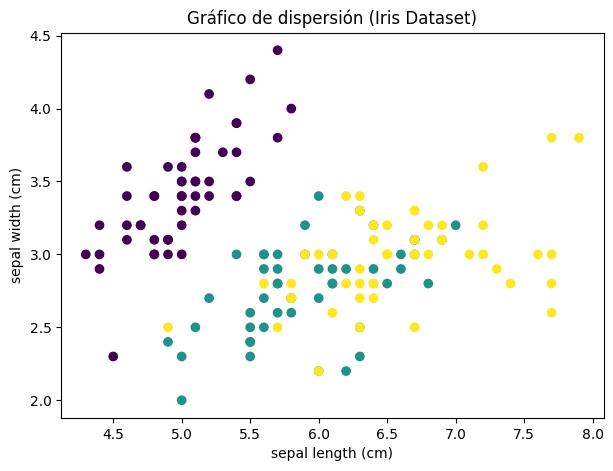

In [4]:
# ======================================================
# 4. PREPROCESAMIENTO
# ======================================================
# Cargamos el dataset Iris

data = load_iris()
X = data.data
y = data.target
columnas = data.feature_names

df = pd.DataFrame(X, columns=columnas)
df["target"] = y

print("Primeras filas del dataset:")
print(df.head())

#Análisis estadístico
print("\nEstadísticas descriptivas:")
print(df.describe())

#Gráfico de dispersión entre dos características
plt.figure(figsize=(7,5))
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=df["target"], cmap="viridis")
plt.xlabel(columnas[0])
plt.ylabel(columnas[1])
plt.title("Gráfico de dispersión (Iris Dataset)")
plt.show()

In [5]:
# ======================================================
# 5. FEATURE ENGINEERING
# ======================================================
# Seleccionamos las dos primeras variables

X = df[[columnas[0], columnas[1]]].values
y = df["target"].values

#Dividimos el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# ======================================================
# 6. MODEL TRAINING
# ======================================================
# Creamos el clasificador kNN con k=5 vecinos

modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(X_train, y_train)
print("\nModelo kNN entrenado correctamente")


Modelo kNN entrenado correctamente


In [7]:
# ======================================================
# 7. PREDICTION
# ======================================================

def predecir_patron(modelo, patron):
    """
    Función para clasificar un patrón nuevo usando el modelo kNN entrenado.
    """
    pred = modelo.predict([patron])
    clase = data.target_names[pred[0]]
    print(f"Patrón {patron} → Clase predicha: {clase}")

#Ejemplo
print("\nPredicciones de prueba:")
predecir_patron(modelo_knn, [5.0, 3.5])
predecir_patron(modelo_knn, [6.2, 2.8])


Predicciones de prueba:
Patrón [5.0, 3.5] → Clase predicha: setosa
Patrón [6.2, 2.8] → Clase predicha: virginica



Matriz de Confusión:
[[10  0  0]
 [ 0  6  3]
 [ 0  3  8]]


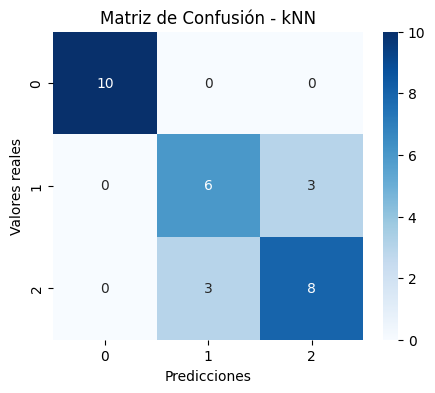


Precisión (Accuracy): 0.80

Interpretación:
- La matriz de confusión muestra cuántos ejemplos de cada clase fueron clasificados correctamente.
- El accuracy indica el porcentaje de aciertos totales del modelo.


In [8]:
# ======================================================
# 8. MODEL EVALUATION
# ======================================================
# Predicciones sobre el conjunto de prueba

y_pred = modelo_knn.predict(X_test)

#Matriz de confusion
matriz = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión:")
print(matriz)

plt.figure(figsize=(5,4))
sns.heatmap(matriz, annot=True, cmap="Blues", fmt="d")
plt.title("Matriz de Confusión - kNN")
plt.xlabel("Predicciones")
plt.ylabel("Valores reales")
plt.show()

#Metrica Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrecisión (Accuracy): {accuracy:.2f}")


print("\nInterpretación:")
print("- La matriz de confusión muestra cuántos ejemplos de cada clase fueron clasificados correctamente.")
print("- El accuracy indica el porcentaje de aciertos totales del modelo.")